## **Importing Dependencies**

In [2]:
import pandas as pd
import numpy as np
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.figure_factory as ff
import plotly.graph_objs as go
import plotly.express as px

from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from mlxtend.plotting import plot_confusion_matrix



## **Importing Dataset**

In [3]:
data=pd.read_csv('/content/heart_failure_clinical_records_dataset (1).csv')
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
data= data.dropna()
data=data.drop(columns='time',axis=0)
data.rename(columns = {'DEATH_EVENT':'Target'}, inplace = True)
print(data.isnull().sum())

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
Target                      0
dtype: int64


## **Analysing dataset to get necessary insights**

In [5]:
data.corr().style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,Target
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.004316


In [6]:
hist_data =[data["age"].values]
age_labels = ['age'] 
age_dis = ff.create_distplot(hist_data,age_labels)
age_dis.update_layout(title_text='Age Distribution plot')
age_dis.show()



*   Dataset consists mostly of people of age ranging from 40 to 75





In [7]:
male = data[data["sex"]==1]
female = data[data["sex"]==0]
male_survi = male[data["Target"]==0]
male_not = male[data["Target"]==1]
female_survi = female[data["Target"]==0]
female_not = female[data["Target"]==1]

labels = ['Male - Survived','Male - Not Survived', "Female -  Survived", "Female - Not Survived"]
values = [len(male[data["Target"]==0]),len(male[data["Target"]==1]),
         len(female[data["Target"]==0]),len(female[data["Target"]==1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Survival of Heart Failure- Gender")
fig.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

/usr/

In [8]:
fig = px.violin(data, y="age", x="sex", color="Target", box=True, points="all", hover_data=data.columns)
fig.update_layout(title_text="Analysis of Age & Gender on Survival Status")
fig.show()


From the above visualizations we infer:
*   Dataset consists more of males.
*   Males of age 58-75 did not survive heart failure.
*   Females of age 50-70 did not survive heart failure.



In [9]:
smoking_yes = data[data['smoking']==1]
smoke_and_die =smoking_yes[smoking_yes["Target"]==1]
smoking_no = data[data['smoking']==0]
nosmoke_and_die =smoking_no[smoking_no["Target"]==1]

labels = ['Smoking','No Smoking']
values = [len(smoke_and_die), len(nosmoke_and_die)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Death- Smoking")
fig.show()

From the piechart, we infer:
*   Out of deaths, 68.8% people didn't smoke
*   In the dataset 67.9% people dont smoke. So, the above may not be a clear representation of deaths where smoking is a reason.



In [10]:
diab_yes = data[data['diabetes']==1]
diab_and_die =diab_yes[diab_yes["Target"]==1]
diab_no = data[data['diabetes']==0]
nodiab_and_die =diab_no[diab_no["Target"]==1]

labels = ['Diabetes','No Diabetes']
values = [len(diab_and_die), len(nodiab_and_die)]

fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(
    title_text="Analysis on Death- Diabetes")
fig.show()

In the dataset, 58.3% of people who succumbed to heart failure had no diabetes.



# **Prepare Data for the model**


In [11]:
y=data['Target']
X=data.drop(columns='Target',axis=0)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

## **Train model**

In [12]:
#model=GradientBoostingClassifier(max_depth=5,max_leaf_nodes=40,learning_rate=0.03, n_estimators=200,random_state=1)
#Accuracy of 73.3%
#model=LogisticRegression(random_state=0) 
#Accuracy of 75%
model=RandomForestClassifier(max_features=1, max_depth=50, random_state=2)
model.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=50, max_features=1,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

# **Evaluate Model**

In [13]:
pred=model.predict(X_test)
score=accuracy_score(pred,y_test)
score


0.8

Model Accuracy: 80.0%


<Figure size 432x288 with 0 Axes>

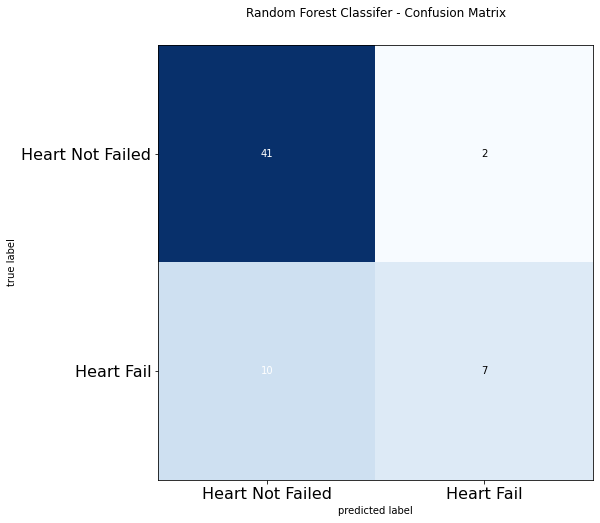

In [14]:
cm = confusion_matrix(y_test,pred)
plt.figure()
plot_confusion_matrix(cm, figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.title("Random Forest Classifer - Confusion Matrix")
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=16)
print("Model Accuracy: {}%".format(score*100))
plt.show()

## **Pickle the Model**

In [15]:
model_filename='heart_failure_model.pkl'
pickle.dump(model, open(model_filename,'wb'))

In [16]:
q=np.asarray([75,1,246,1,16,1,127005,1.2,140,1,1])
print(model.predict(q.reshape(1,-1)))

[1]
